In [3]:
import numpy as np
import keras
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from collections import Counter
import math
import csv
#"Number of result"
k=0

#"Absolute magnitude parameter"
h = 0

#"object diameter (from equivalent sphere) km Unit"
diameter = 0

#"Geometric albedo"
albedo = 0

#"1-sigma uncertainty in object diameter km Unit"
diameter_sigma = 0

#"Eccentricity"
e = 0

#"Semi-major axis au Unit"
a = 0

#"perihelion distance au Unit"
q = 0

#"inclination; angle with respect to x-y ecliptic plane"
i = 0

#"Minimum orbit intersection distance"
moid = 0

query = [h, diameter, albedo, diameter_sigma, e, a, q, i, moid]

#########################################################################################
#data : un ensemble de données connues pour effectuer la classification.
#query : un point de données à classer.
#k : le nombre de voisins les plus proches à considérer lors de la classification.
#distance_fn : une fonction qui calcule la distance entre deux points de données.
#choice_fn : une fonction qui calcule la classe majoritaire des k plus proches voisins.
#Fonction qui permet de classer les données en fonction de leur similarité avec d'autres données connues
def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    for index , example in enumerate(data):
        distance = distance_fn(example[:-1], query)
        neighbor_distances_and_indices.append((distance, index))
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

#Fonction qui retroune la moyenne, le min , le max d'une des colones du fichier csv donné en paramètre
def calculate_statistics(filename, column_number):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        values = []
        for row in reader:
            if row[column_number] != '0':
                values.append(float(row[column_number]))
        if len(values) > 0:
            mean = sum(values) / len(values)
            minimum = min(values)
            maximum = max(values)
            return mean, minimum, maximum
        else:
            return None    

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def mostSimilaPlanet():
    raw_planet_data = []
    with open('dataset.csv', 'r') as md:
        next(md)
        for line in md.readlines():
            data_row = line.strip().split(',')
            raw_planet_data.append(data_row)
    planet_recommendation_data = []
    for row in raw_planet_data:
        data_row = list(map(float, row[5:]))
        planet_recommendation_data.append(data_row)
    recommendation_indices, _ = knn(
        planet_recommendation_data, query, k,
        distance_fn=euclidean_distance, choice_fn=lambda x: None
    )
    movie_recommendations = []
    for _, index in recommendation_indices:
        movie_recommendations.append(raw_planet_data[index])
    return movie_recommendations

def main():
    recommended_planet = mostSimilaPlanet()
    for recommendation in recommended_planet:
        print(recommendation[2])
main()
#########################################################################################

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

On importe le jeu de données MNIST de Keras.

In [ ]:
from keras.datasets import mnist
(X_train_0, y_train_0), (X_test_0, y_test_0) = mnist.load_data()

In [ ]:
print('Regardons le format de ces donnees\n')
print('X_train_0.shape',X_train_0.shape)
print('X_train_0[',i,']',X_train_0[i])
print('y_train_0.shape',y_train_0.shape)
print('X_test_0.shape',X_test_0.shape)
print('y_test_0.shape',y_test_0.shape)

Regardons le format de ces donnees

X_train_0.shape (60000, 28, 28)
X_train_0[ 9 ] [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   

```
## Regardons le format de ces donnees
##
## X_train_0.shape (60000, 28, 28)
## y_train_0.shape (60000,)
## X_test_0.shape (10000, 28, 28)
## y_test_0.shape (10000,)
```

In [ ]:
# On reformate les donnees pour qu'elles soient sous la forme de tableaux a deux dimensions
num_pixels = X_train_0.shape[1] * X_train_0.shape[2]
img_cols = X_train_0.shape[1]
img_rows = X_train_0.shape[2]
X_train  = X_train_0.reshape(X_train_0.shape[0], num_pixels)
X_test   = X_test_0.reshape(X_test_0.shape[0], num_pixels)
y_train  = y_train_0.reshape(y_train_0.shape[0], 1)
y_test   = y_test_0.reshape(y_test_0.shape[0], 1)
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
y_train  = y_train.astype('float32')
y_test   = y_test.astype('float32')
X_train  = X_train / 255
X_test   = X_test / 255

In [ ]:
print('Regardons le format de ces donnees transformees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)

Regardons le format de ces donnees transformees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)


```
## Regardons le format de ces donnees transformees
##
## X_train.shape (60000, 784)
## y_train.shape (60000, 1)
## X_test.shape (10000, 784)
## y_test.shape (10000, 1)
```

# Classification binaire pour le chiffre 5

On veut apprendre à reconnaitre le chiffre 5.

In [ ]:
# Dans un premier temps, on reformate les donnees pour que la classe associee aux images d'un 5 soit 1
# et la classe des autres images soit 0

y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new
print(y_train[3000])

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

num_train_samples  = X_train.shape[0] # nombre de donnes d'apprenstissage
print('Nombre de donnees d''apprentissage',num_train_samples)
num_test_samples  = X_train.shape[0]  # nombre de donnees de test
print('Nombre de donnees de test',num_test_samples)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
Nombre de donnees dapprentissage 60000
Nombre de donnees de test 60000


In [ ]:
print('Regardons les donnees reformatees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)
print('\nNombre d\'exemples',num_train_samples)
print('Nombre de pixels par image',num_pixels)

Regardons les donnees reformatees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)

Nombre d'exemples 60000
Nombre de pixels par image 784


```
## Regardons les donnees reformatees
##
## X_train.shape (60000, 784)
## y_train.shape (60000, 1)
## X_test.shape (10000, 784)
## y_test.shape (10000, 1)
##
## Nombre d'exemples 60000
## Nombre de pixels par image 784
```

In [ ]:
# On ordonne aleatoirement les donnees d'apprentissage
np.random.seed(138)
shuffle_index = np.random.permutation(num_train_samples)
X_train, y_train = X_train[shuffle_index,:], y_train[shuffle_index,:]

In [ ]:
# Afficher l'image i du jeu de donnees X et son score dans y
def show_image(i,X,Y):
    print('y[{}]={}'.format(i, Y[i,:]))
    plt.imshow(X[i,:].reshape(img_rows,img_cols), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

Regardons quelques images utilisees pour l'apprentissage
y[34]=[0.]


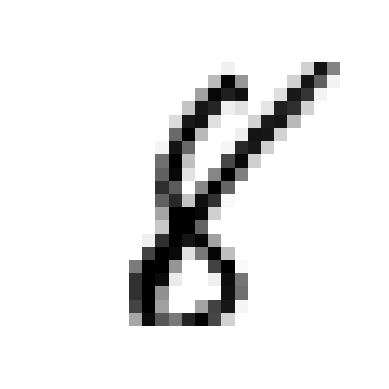

y[30]=[0.]


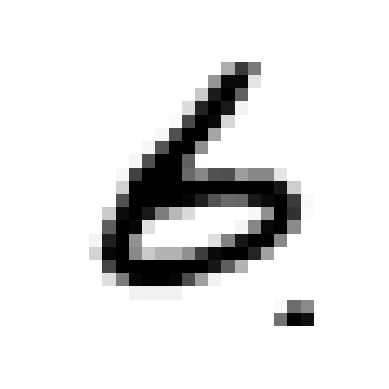

In [ ]:
print('Regardons quelques images utilisees pour l\'apprentissage')
show_image(np.random.randint(0,100),X_train,y_train)
show_image(np.random.randint(0,100),X_train,y_train)

```
## Regardons quelques images utilisees pour l'apprentissage
## y[34]=[0.]
## y[30]=[0.]
```
![is5_random1](is5_random1.png)
![is5_random2](is5_random2.png)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Fonctions permettant de visualiser l'historique d'apprentissage
def plot_train_history_accuracy(history):
    acc = list(history.history.keys())[1]
    plt.plot(history.history[acc])
    plt.title('model accuracy')
    plt.ylabel(acc)
    plt.xlabel('epoch')
    plt.show()
    
def plot_train_history_loss(history):
    loss = list(history.history.keys())[0]
    plt.plot(history.history[loss])
    plt.title('model loss')
    plt.ylabel(loss)
    plt.xlabel('epoch')
    plt.show()

## Modèle avec 1 seul neurone

On crée un modèle à un seul neurone, utilisant la fonction de perte `binary_crossentropy`, l'optimiseur `adam` et la métrique `binary_accuracy` (on fait de la classification binaire).

In [ ]:
# Creation du modele
# -- Parametres du modele
model_1_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Architecture du modele
model_1 = Sequential()
model_1.add(Dense(1, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
# -- Compilation
model_1.compile(loss=model_1_functions['loss'],optimizer=model_1_functions['optimizer'],metrics=model_1_functions['metrics'])

In [ ]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_1 = {'batch_size': 128, 'epochs': 10}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_1_history = model_1.fit(X_train, y_train, batch_size=learning_parameters_1['batch_size'], epochs=learning_parameters_1['epochs'], verbose=0)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


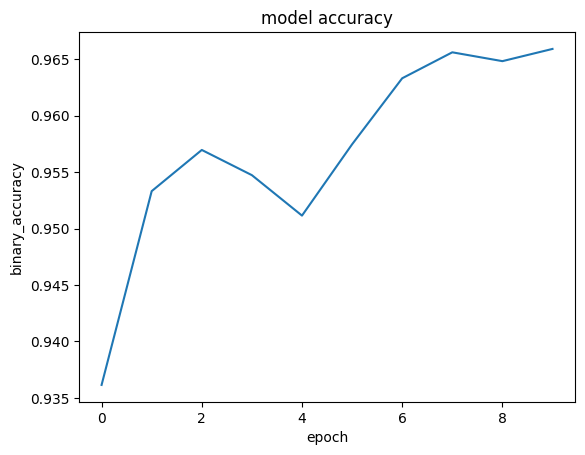

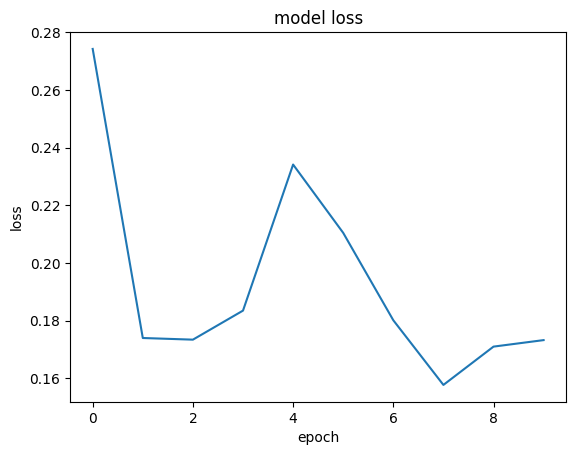

In [ ]:
# -- Resume
model_1.summary()
plot_train_history_accuracy(model_1_history)
plot_train_history_loss(model_1_history)

```
## Model: "sequential"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## dense (Dense)               (None, 1)                 785       
##                                                                 
## =================================================================
## Total params: 785
## Trainable params: 785
## Non-trainable params: 0
## _________________________________________________________________
```
![neurone1_accuracy](neurone1_accuracy.png)
![neurone1_loss](neurone1_loss.png)

In [ ]:
# Prediction sur le jeu de test
final_loss_1, final_acc_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_1, final_acc_1))
y_test_predictions_1 = model_1.predict(X_test)

Perte finale sur les donnees de test: 0.146260, exactitude finale sur les donnees de test: 0.971800
313/313 [==============================] - 0s 1ms/step


```
## Perte finale sur les donnees de test: 0.203753, exactitude finale sur les donnees de test: 0.961600
```

y[8]=[0.]


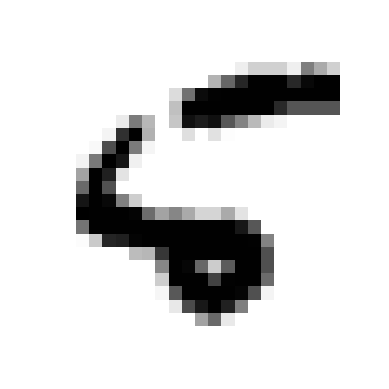

y[15]=[1.0082102]


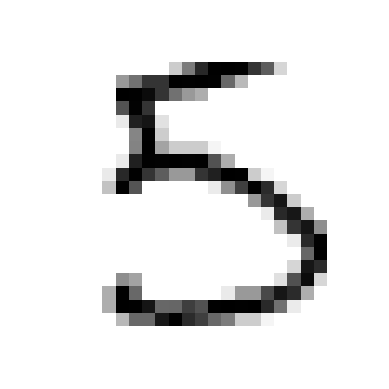

y[23]=[1.1607003]


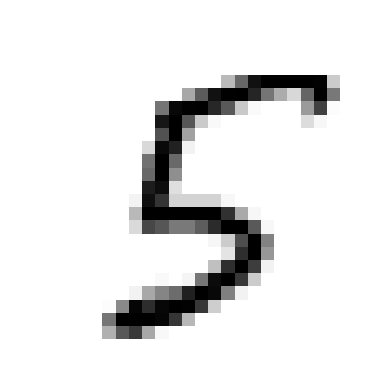

y[45]=[0.89861816]


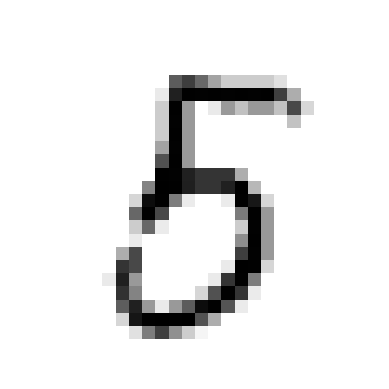

y[52]=[0.41197085]


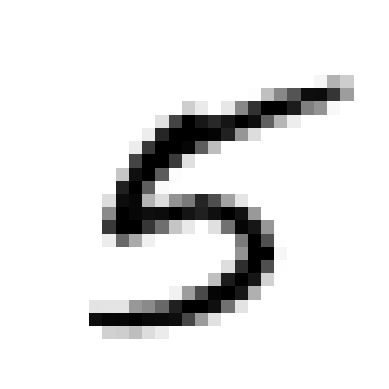

y[53]=[0.52013075]


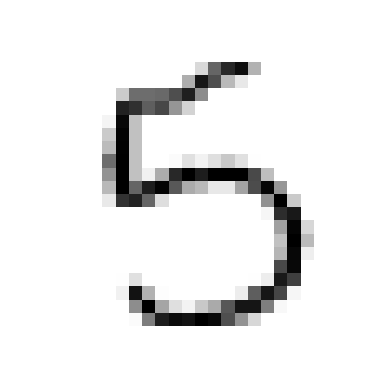

y[59]=[0.48968148]


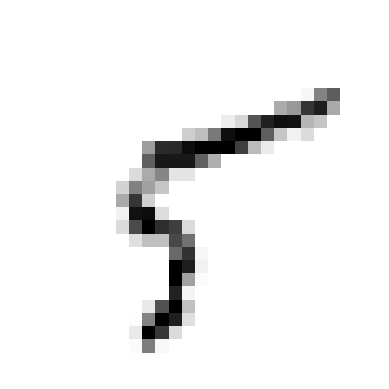

In [ ]:
# Quelques exemples choisis au hasard
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_1)
    if y_test_predictions_1[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_1)

```
## y[8]=[0.]
## y[15]=[0.8508051]
## y[23]=[0.933394]
## y[32]=[0.52359885]
## y[45]=[0.8185054]
## y[52]=[0.47971982]
## y[53]=[0.69859356]
## y[59]=[0.50010645]
## y[84]=[0.50641185]
```
![is5_8](is5_8.png)
![is5_15](is5_15.png)
![is5_23](is5_23.png)
![is5_32](is5_32.png)
![is5_45](is5_45.png)
![is5_52](is5_52.png)
![is5_53](is5_53.png)
![is5_59](is5_59.png)
![is5_84](is5_84.png)


#### Commentaires?

## Modèle avec une couche cachée de 64 neurones

On ajoute une couche cachée de 64 neurones

In [ ]:
# Creation du modele
# -- Parametres du modele
model_2_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Architecture du modele
model_2 = Sequential()
model_2.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# -- Compilation
model_2.compile(loss=model_2_functions['loss'],optimizer=model_2_functions['optimizer'],metrics=model_2_functions['metrics'])

In [ ]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_2 = {'batch_size': 128, 'epochs': 10}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_2_history = model_2.fit(X_train, y_train, batch_size=learning_parameters_2['batch_size'], epochs=learning_parameters_2['epochs'], verbose=0)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50,305
Trainable params: 50,305
Non-trainable params: 0
_________________________________________________________________


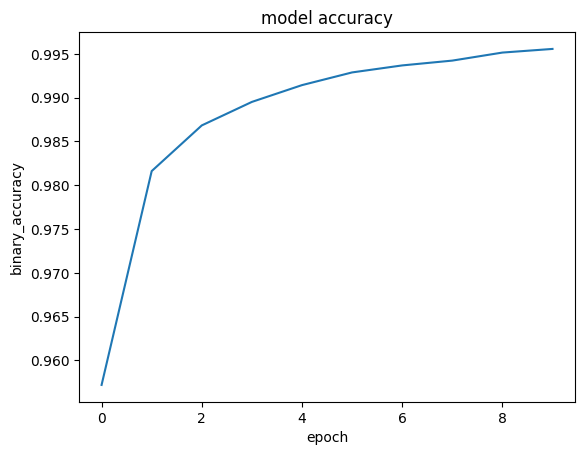

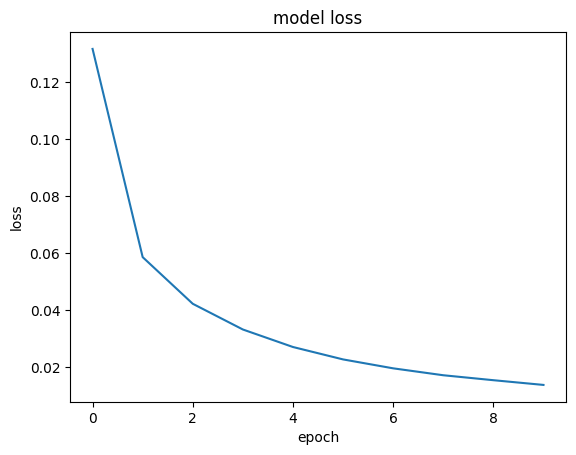

In [ ]:
# -- Resume
model_2.summary()
plot_train_history_accuracy(model_2_history)
plot_train_history_loss(model_2_history)

```
## Model: "sequential_1"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## dense_1 (Dense)             (None, 64)                50240     
##                                                                 
## dense_2 (Dense)             (None, 1)                 65        
##                                                                 
## =================================================================
## Total params: 50,305
## Trainable params: 50,305
## Non-trainable params: 0
## _________________________________________________________________
```
![neurone64_accuracy](neurone64_accuracy.png)
![neurone64_loss](neurone64_loss.png)

In [ ]:
# Prediction sur le jeu de test
final_loss_2, final_acc_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_2, final_acc_2))
y_test_predictions_2 = model_2.predict(X_test)

Perte finale sur les donnees de test: 0.017569, exactitude finale sur les donnees de test: 0.994400
313/313 [==============================] - 0s 1ms/step


```
## Perte finale sur les donnees de test: 0.018527, exactitude finale sur les donnees de test: 0.993100
```

y[8]=[0.02860486]


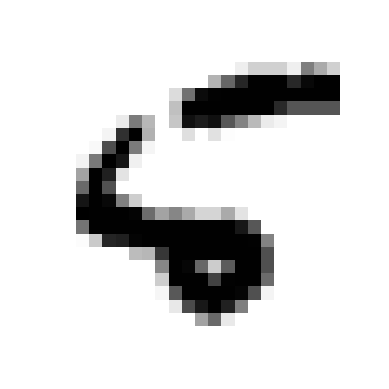

y[15]=[0.98789805]


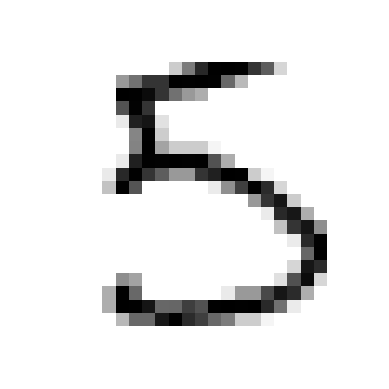

y[23]=[0.9992691]


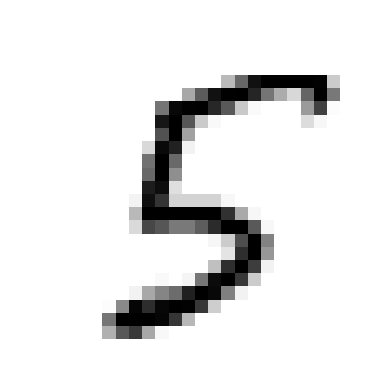

y[45]=[0.98633665]


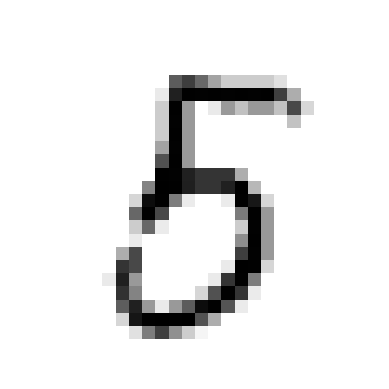

y[52]=[0.9981011]


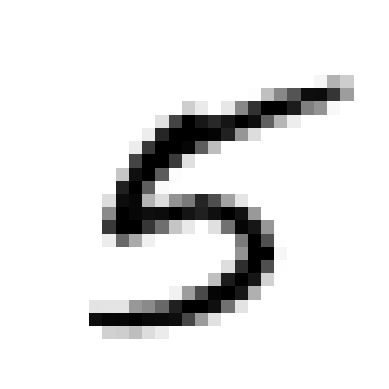

y[53]=[0.9942567]


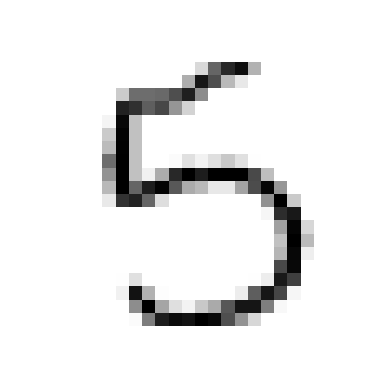

y[59]=[0.99014074]


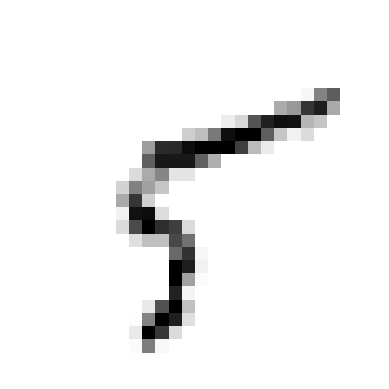

In [ ]:
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_2)
    if y_test_predictions_2[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_2)

```
## y[8]=[0.29128146]
## y[15]=[0.9523465]
## y[23]=[0.99929726]
## y[45]=[0.98081803]
## y[52]=[0.9724734]
## y[53]=[0.9941415]
## y[59]=[0.96948206]
```
![is5_8](is5_8.png)
![is5_15](is5_15.png)
![is5_23](is5_23.png)
![is5_45](is5_45.png)
![is5_52](is5_52.png)
![is5_53](is5_53.png)
![is5_59](is5_59.png)

# Classification pour tous les chiffres

On modifie le reseau pour reconnaitre tous les chiffres et non plus seulement faire de la classification binaire (5 versus not-5).

In [ ]:
from keras.utils import np_utils

num_classes = 10
y_train_cat = np_utils.to_categorical(y_train_0,num_classes)
y_test_cat  = np_utils.to_categorical(y_test_0,num_classes)

## Modèle avec 2 couches cachées de 64 neurones

In [ ]:
# Creation du modele
# -- Parametres du modele
model_3_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
# -- Architecture du modele
model_3 = Sequential()
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_3.compile(loss=model_3_functions['loss'],optimizer=model_3_functions['optimizer'],metrics=model_3_functions['metrics'])

In [ ]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_3 = {'batch_size': 128, 'epochs': 50}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_3_history = model_3.fit(X_train, y_train_cat, batch_size=learning_parameters_3['batch_size'], epochs=learning_parameters_3['epochs'], verbose=0)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


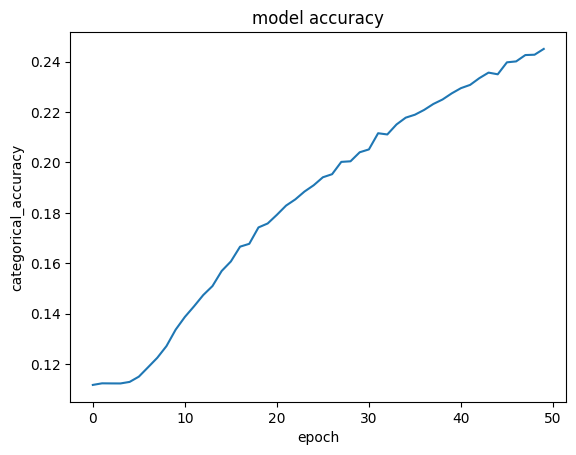

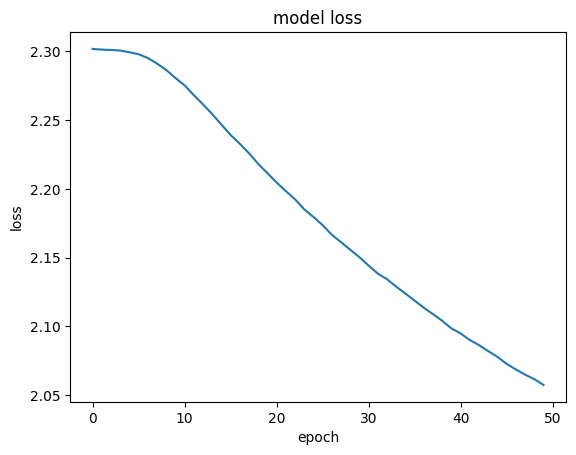

In [ ]:
# -- Resume
model_3.summary()
plot_train_history_accuracy(model_3_history)
plot_train_history_loss(model_3_history)

```
## Model: "sequential_2"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## dense_3 (Dense)             (None, 64)                50240     
##                                                                 
## dense_4 (Dense)             (None, 64)                4160      
##                                                                 
## dense_5 (Dense)             (None, 10)                650       
##                                                                 
## =================================================================
## Total params: 55,050
## Trainable params: 55,050
## Non-trainable params: 0
## _________________________________________________________________
```
![neurone2x64_accuracy](neurone2x64_accuracy.png)
![neurone2x64_loss](neurone2x64_loss.png)

In [ ]:
# Prediction sur le jeu de test
final_loss_3, final_acc_3 = model_3.evaluate(X_test, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_3, final_acc_3))
y_test_predictions_3 = model_3.predict(X_test)

Perte finale sur les donnees de test: 2.622287, exactitude finale sur les donnees de test: 0.100500
313/313 [==============================] - 0s 1ms/step


```
## Perte finale sur les donnees de test: 2.614959, exactitude finale sur les donnees de test: 0.099300
```

y[0]=[0.02067526 0.17299834 0.12052589 0.1610014  0.12559803 0.09181047
 0.10643602 0.02644533 0.02673842 0.1477709 ]


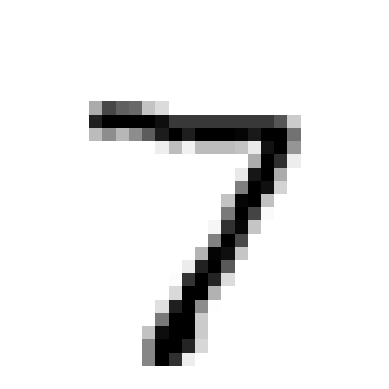

y[1]=[0.08914731 0.07446891 0.07076193 0.12563168 0.09571074 0.13179696
 0.17858082 0.12818764 0.04942079 0.05629327]


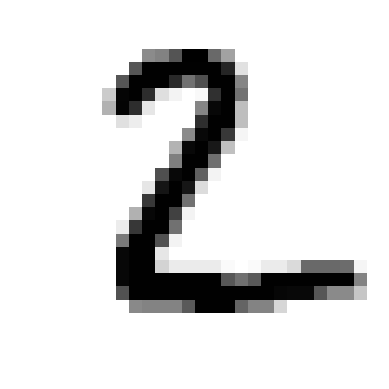

y[2]=[0.06541143 0.10679002 0.18629152 0.06604464 0.0898939  0.06186353
 0.09947408 0.08472056 0.10245301 0.13705726]


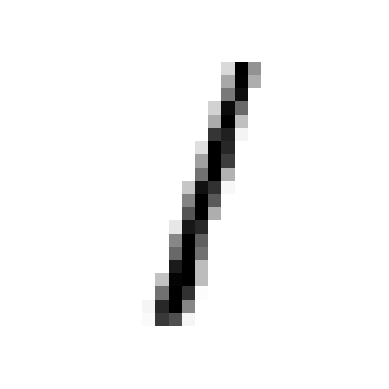

y[3]=[0.13871413 0.10876248 0.08807433 0.07354268 0.14180239 0.09592358
 0.0848486  0.07476224 0.10146476 0.09210476]


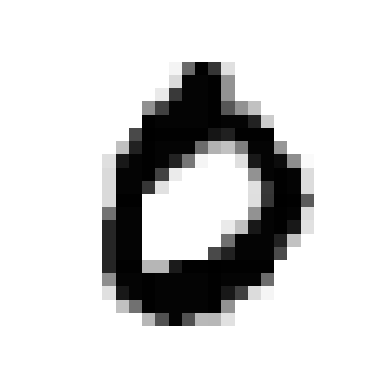

y[4]=[0.06490764 0.11922396 0.11505439 0.09391746 0.04816841 0.10997327
 0.1530434  0.0734981  0.11975512 0.10245813]


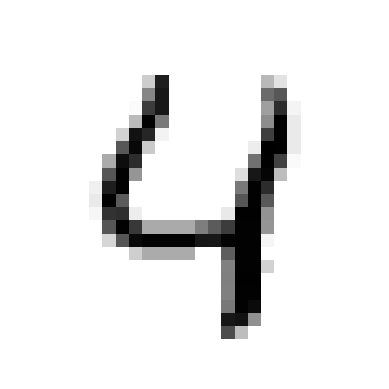

y[5]=[0.08364744 0.08549565 0.14650969 0.09116146 0.1224343  0.08527699
 0.13079111 0.08786032 0.07136496 0.09545808]


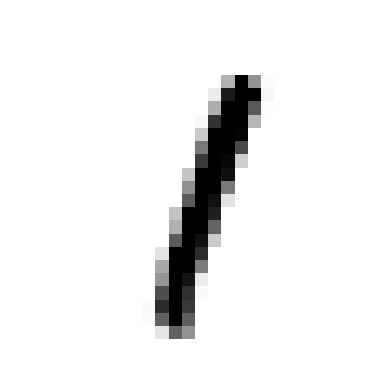

y[6]=[0.02731783 0.0339363  0.0224281  0.05712971 0.42376933 0.13252205
 0.08102694 0.04221629 0.09608138 0.08357207]


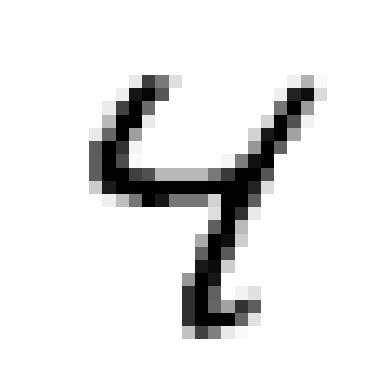

y[7]=[0.11478505 0.22249968 0.07776129 0.1303334  0.04365124 0.01328716
 0.14234953 0.0317422  0.04971667 0.17387378]


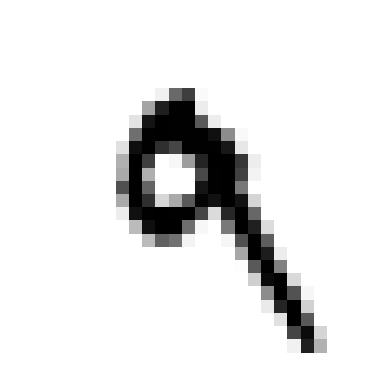

y[8]=[0.08518225 0.06350693 0.29409358 0.09223413 0.00100934 0.01309683
 0.01032398 0.01631527 0.35601127 0.06822634]


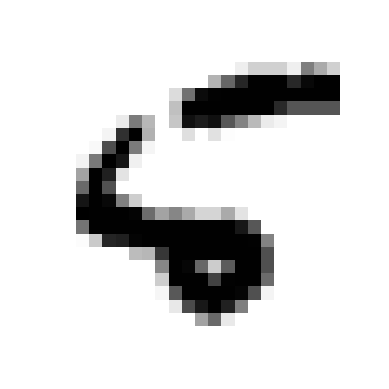

y[9]=[0.09602455 0.09075975 0.1166804  0.10397492 0.09803386 0.11554535
 0.1052779  0.08249923 0.06696482 0.12423923]


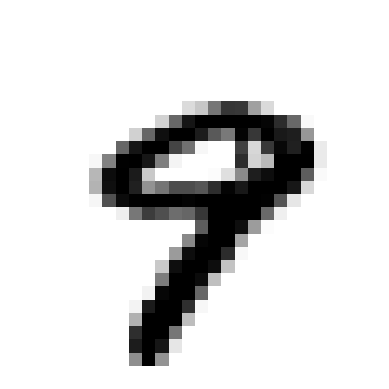

In [ ]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_3)

```
## y[0]=[0.16281545 0.1173299  0.05693516 0.10273345 0.08746524 0.10595699 0.12046865 0.05378396 0.14406249 0.04844872]
## y[1]=[0.05216441 0.04349981 0.03605977 0.15977919 0.10273835 0.02611828 0.44649547 0.0377673  0.03104113 0.06433626]
## y[2]=[0.09788322 0.11862788 0.08240269 0.08698214 0.13082416 0.05660462 0.11849659 0.13929252 0.08189297 0.08699314]
## y[3]=[0.09815832 0.11570205 0.06317189 0.13648759 0.11287769 0.13927104 0.08901155 0.0907776  0.06425376 0.09028849]
## y[4]=[0.12606679 0.15446827 0.03564796 0.13464415 0.13424502 0.07947717 0.05067337 0.05715863 0.12938939 0.09822927]
## y[5]=[0.08710498 0.09832148 0.17565586 0.08646388 0.10341191 0.06050617 0.12173753 0.10435271 0.06615194 0.09629346]
## y[6]=[0.05944629 0.03025002 0.07693496 0.03388218 0.16456021 0.04359526 0.05945991 0.20069426 0.24324118 0.08793575]
## y[7]=[0.8572022  0.0127816  0.00219625 0.01541828 0.0024446  0.00464313 0.04673591 0.00099768 0.04584493 0.01173541]
## y[8]=[0.01286772 0.27764538 0.11284747 0.16975999 0.00411726 0.11058369 0.02988146 0.17832306 0.09544756 0.00852644]
## y[9]=[0.01153136 0.03340643 0.15171498 0.04497335 0.04670532 0.23156948 0.07323335 0.21422522 0.11856953 0.07407112]
```
![y0](y0.png)
![y1](y1.png)
![y2](y2.png)
![y3](y3.png)
![y4](y4.png)
![y5](y5.png)
![y6](y6.png)
![y7](y7.png)
![y8](y8.png)
![y9](y9.png)

## Modèle avec un réseau convolutif

Un réseau convolutif, voir l'[article](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
# On reformate les donnees
X_train_cnn = np.expand_dims(X_train_0, axis=3)
X_test_cnn  = np.expand_dims(X_test_0, axis=3)
input_shape = (28,28,1)

In [ ]:
# Creation du modele
# -- Parametres du modele
model_4_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
model_4_cnn_parameters = {'num_filters':8,'filter_size':3,'pool_size':2}
# -- Architecture du modele
model_4 = Sequential()
model_4.add(Conv2D(model_4_cnn_parameters['num_filters'], model_4_cnn_parameters['filter_size'], input_shape=input_shape, activation='relu'))
model_4.add(MaxPooling2D(pool_size=model_4_cnn_parameters['pool_size']))
model_4.add(Flatten())
model_4.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_4.compile(loss=model_4_functions['loss'],optimizer=model_4_functions['optimizer'],metrics=model_4_functions['metrics'])

In [ ]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_4 = {'batch_size': 128, 'epochs': 5}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_4_history = model_4.fit(X_train_cnn, y_train_cat, batch_size=learning_parameters_4['batch_size'], epochs=learning_parameters_4['epochs'], verbose=0)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1352)              0         
                                                                 
 dense_39 (Dense)            (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


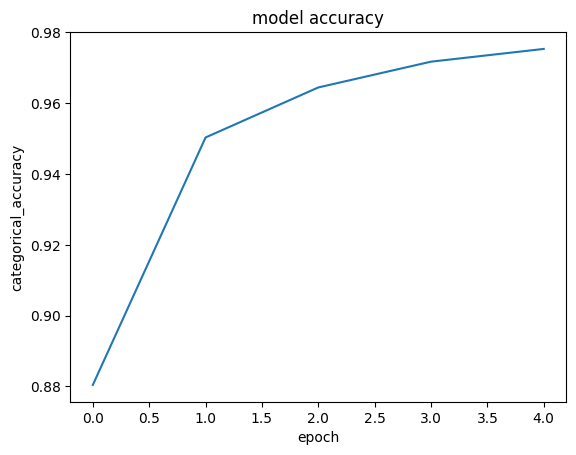

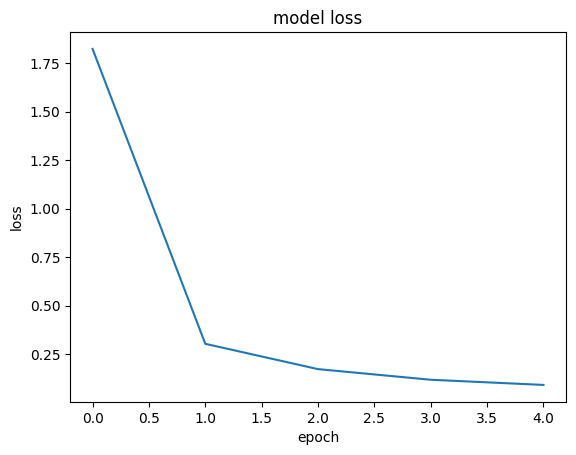

In [ ]:
# -- Resume
model_4.summary()
plot_train_history_accuracy(model_4_history)
plot_train_history_loss(model_4_history)

```
## Model: "sequential_3"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## conv2d (Conv2D)             (None, 26, 26, 8)         80        
##                                                                 
## max_pooling2d (MaxPooling2D)  (None, 13, 13, 8)        0         
##                                                                 
## flatten (Flatten)           (None, 1352)              0         
##                                                                 
## dense_6 (Dense)             (None, 10)                13530     
##                                                                 
## =================================================================
## Total params: 13,610
## Trainable params: 13,610
## Non-trainable params: 0
## _________________________________________________________________
```
![conv_accuracy](conv_accuracy.png)
![conv_loss](conv_loss.png)

In [ ]:
# Prediction sur le jeu de test
final_loss_4, final_acc_4 = model_4.evaluate(X_test_cnn, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_4, final_acc_4))
y_test_predictions_4 = model_4.predict(X_test_cnn)

Perte finale sur les donnees de test: 0.150106, exactitude finale sur les donnees de test: 0.967700
313/313 [==============================] - 1s 3ms/step


```
## Perte finale sur les donnees de test: 0.142493, exactitude finale sur les donnees de test: 0.966300
```

y[0]=[2.2460751e-16 8.2299442e-17 2.5659845e-12 9.9013278e-08 8.8490903e-19
 6.3268025e-15 4.9677733e-19 9.9999982e-01 3.9202599e-10 5.5013172e-09]


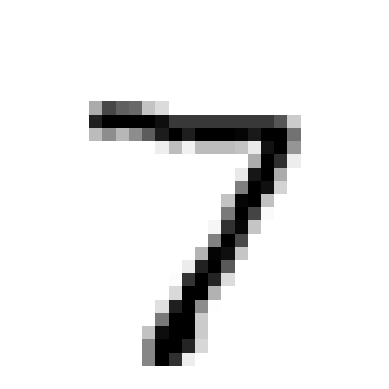

y[1]=[1.5023760e-10 3.0245648e-12 9.9999994e-01 1.1308287e-09 8.5949416e-20
 4.1809863e-12 5.8648553e-08 1.9637277e-19 6.1418841e-16 4.1735500e-17]


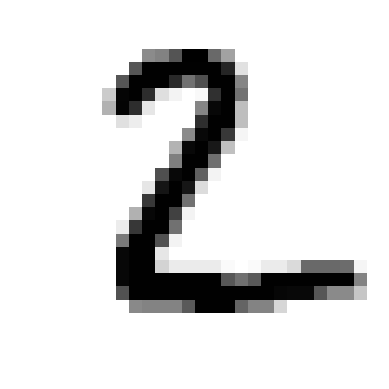

y[2]=[1.0403006e-07 9.9993581e-01 3.2909961e-06 1.2350436e-07 5.1744944e-05
 4.3173489e-11 2.8257908e-08 5.7171951e-06 3.0324786e-06 7.5887616e-09]


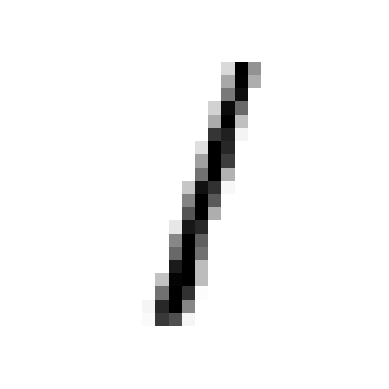

y[3]=[9.9999994e-01 2.0529851e-16 5.1978916e-10 7.4091415e-14 1.2879658e-13
 6.0726279e-14 3.2528816e-10 1.2007978e-13 2.1879877e-14 2.4562891e-10]


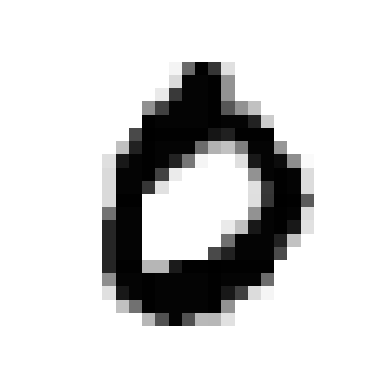

y[4]=[2.3782646e-15 4.4813612e-16 2.3826584e-16 3.3088363e-14 9.9999994e-01
 2.0204761e-18 9.1914876e-13 3.1046405e-12 5.1191260e-12 1.3133858e-10]


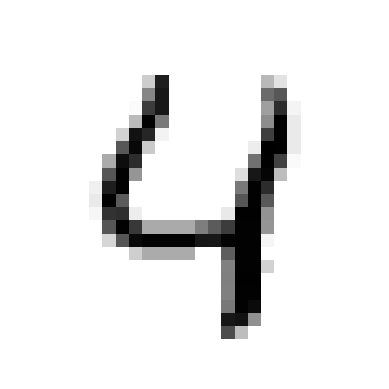

y[5]=[3.5962289e-11 9.9999934e-01 2.7036410e-08 8.3502736e-12 1.4927805e-10
 4.5770209e-16 5.4382514e-12 6.5346990e-07 6.0360565e-09 2.9803737e-10]


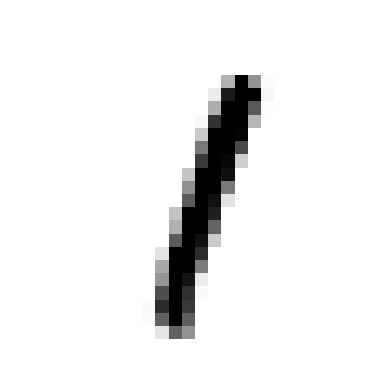

y[6]=[8.4219144e-21 1.0502899e-08 4.3430747e-14 4.8488679e-14 9.9999994e-01
 9.6975142e-15 1.9981132e-15 1.4065789e-10 1.7228251e-09 6.9131706e-10]


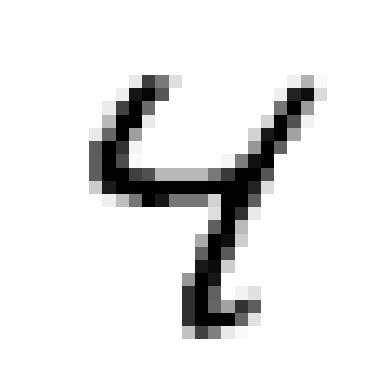

y[7]=[3.4664988e-20 2.9177591e-13 6.3452671e-10 6.1402151e-12 2.3575665e-05
 5.9576782e-10 5.4379986e-16 3.0680632e-12 3.6143820e-07 9.9997598e-01]


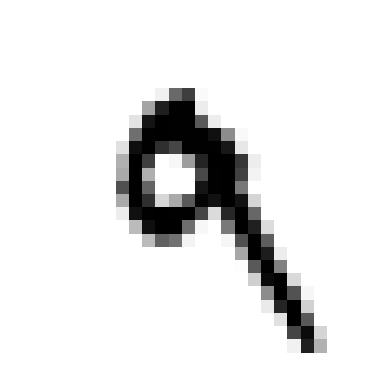

y[8]=[9.3738095e-08 2.1969976e-14 6.5926409e-13 1.7220081e-10 7.5630728e-09
 1.1218320e-01 8.8027871e-01 3.6253354e-13 7.5379647e-03 3.6307423e-08]


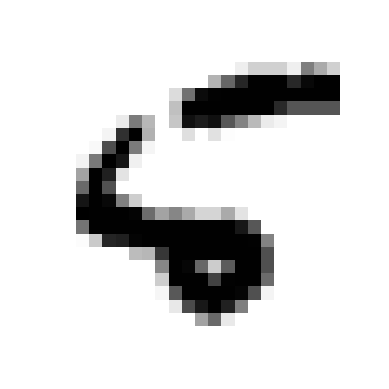

y[9]=[3.34832752e-11 1.69134681e-15 5.18501908e-12 2.72780412e-08
 5.99923808e-08 1.83205326e-11 1.00240244e-13 2.92982313e-05
 9.92836716e-11 9.99970496e-01]


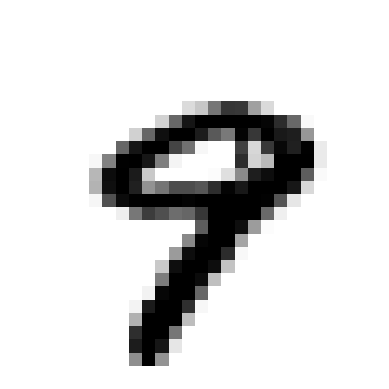

In [ ]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_4)

```
## y[0]=[4.5193189e-16 5.7831611e-17 5.4262386e-11 7.2845840e-10 2.1925894e-16 3.2268354e-21 1.9808476e-23 1.0000000e+00 9.5324664e-15 1.0649881e-11]
## y[1]=[1.1020174e-09 1.8969848e-09 1.0000000e+00 1.9481675e-15 6.3035375e-21 3.1732914e-16 3.9040313e-10 1.7707114e-21 2.9784920e-19 3.5481429e-26]
## y[2]=[1.1822509e-09 9.9992132e-01 1.1849968e-06 5.1752681e-07 6.9176436e-05 3.1612270e-08 2.2765903e-08 2.3011448e-06 5.0022190e-06 5.4026287e-07]
## y[3]=[9.9999988e-01 2.1754318e-19 1.1579071e-07 3.1549704e-11 9.8314293e-13 1.1542542e-13 1.2846354e-11 5.1325255e-10 1.0827605e-14 1.6853505e-13]
## y[4]=[8.7714391e-11 2.6834902e-17 5.9114179e-11 1.2368757e-08 9.9999392e-01 2.7537269e-17 1.2376503e-11 9.7850295e-10 3.3718294e-08 6.0599182e-06]
## y[5]=[2.7008413e-08 9.9856949e-01 1.3751866e-05 5.1421756e-07 6.5093423e-04 5.3477448e-11 9.9189697e-07 5.2662304e-04 2.2443356e-04 1.3322286e-05]
## y[6]=[1.0761636e-14 1.1072611e-09 1.8516411e-13 7.0033289e-12 9.9999964e-01 3.2864957e-13 6.4319670e-18 3.7561985e-12 3.5941321e-07 1.5149375e-08]
## y[7]=[3.0571043e-13 6.8577624e-09 8.2965521e-08 8.0896185e-05 1.3196903e-01 2.4283070e-05 1.8437448e-11 1.6632761e-06 3.4585081e-03 8.6446548e-01]
## y[8]=[4.5842107e-08 1.7659237e-17 4.1552287e-10 2.6097288e-08 7.6798869e-09 1.4162673e-01 8.5830569e-01 2.4848817e-20 6.7560846e-05 1.2194048e-08]
## y[9]=[1.3694067e-11 2.7254711e-17 2.7708597e-12 9.6671774e-06 1.6688490e-04 1.8421648e-08 4.7383705e-15 1.5283602e-05 1.1261792e-07 9.9980801e-01]
````
![y0](y0.png)
![y1](y1.png)
![y2](y2.png)
![y3](y3.png)
![y4](y4.png)
![y5](y5.png)
![y6](y6.png)
![y7](y7.png)
![y8](y8.png)
![y9](y9.png)